# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Timer Class for Benchmarking

Taken from: http://howto.lintel.in/how-to-measure-the-duration-of-a-function-call-or-code-block-in-python/

In [1]:
import time

class StopWatch:
    def __init__(self):
        self.start = None
        self.end = None

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time.time()
        print("Total time taken: {:.2f} seconds".format((self.end - self.start)))

    def duration(self):
        return str((self.end - self.start)) + ' seconds'

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'
validation_file = 'traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
    
clr_X_train, y_train = train['features'], train['labels']
clr_X_test, y_test = test['features'], test['labels']
clr_X_validation, y_validation = validation['features'], validation['labels']


# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Updated image shape: ", format(clr_X_train[0].shape))

print("X_train: ", clr_X_train.shape, ", X_validation: ", clr_X_validation.shape, ", X_test: ", clr_X_test.shape)
print("y_train: ", y_train.shape, ", y_validation: ", y_validation.shape, ", y_test: ", y_test.shape)

Updated image shape:  (32, 32, 3)
X_train:  (34799, 32, 32, 3) , X_validation:  (4410, 32, 32, 3) , X_test:  (12630, 32, 32, 3)
y_train:  (34799,) , y_validation:  (4410,) , y_test:  (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = clr_X_train.shape[0]

# TODO: Number of testing examples.
n_test = clr_X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = clr_X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape (before preprocessing) =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape (before preprocessing) = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

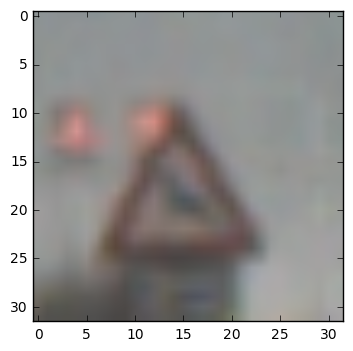

Min pixel for gray_image:  68
Max pixel for gray_image:  171
Min pixel for hist_image:  0
Max pixel for hist_image:  255
uint8
Min pixel for norm_image:  0
Max pixel for norm_image:  255
Min pixel for norm_hist_image:  0
Max pixel for norm_hist_image:  255
31


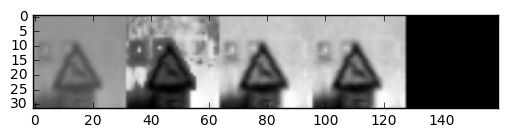

In [4]:
import random
import cv2
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(clr_X_train))
# image = X_train[index].squeeze()
image = clr_X_train[index]

plt.imshow(image)
plt.show()


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Min pixel for gray_image: ", np.min(gray_image))
print("Max pixel for gray_image: ", np.max(gray_image))

hist_image = cv2.equalizeHist(gray_image)
print("Min pixel for hist_image: ", np.min(hist_image))
print("Max pixel for hist_image: ", np.max(hist_image))

print(gray_image.dtype)
norm_image = cv2.normalize(gray_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print("Min pixel for norm_image: ", np.min(norm_image))
print("Max pixel for norm_image: ", np.max(norm_image))

norm_hist_image = cv2.normalize(norm_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
print("Min pixel for norm_hist_image: ", np.min(norm_hist_image))
print("Max pixel for norm_hist_image: ", np.max(norm_hist_image))


print(y_train[index])

# plt.figure(figsize=(10,10))
plt.imshow(np.hstack((gray_image, hist_image, norm_image, norm_hist_image, norm_image-norm_hist_image)), cmap='gray')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

def preprocess(img):
    # Convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # For some images, histogram equalization gives a better picture
    hist_image = cv2.equalizeHist(gray_image)
    
    # We normalize in order to deal with overly bright or overly dark pictures
    norm_image = cv2.normalize(gray_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # Keep each version of the original as a separate channel
    return np.stack([norm_image], axis = -1)

def preprocess_list(images):
    processed_images = [preprocess(img) for img in images]
    return np.array(processed_images).reshape((images.shape[0],) + processed_images[0].shape)
#     print("Shape image: ", [preprocess(img) for img in images][0].shape)
#     return np.array([preprocess(img) for img in images]).reshape((images.shape[0],) + images[0].shape)
#     return images

print("Preprocessing images")
with StopWatch() as sw:
#     X_train = X_train[:5]
    print("Shape before preprocessing: ", clr_X_train.shape)
    X_train = preprocess_list(clr_X_train)
    print("Shape after preprocessing: ", X_train.shape)
    X_test = preprocess_list(clr_X_test)
    X_validation = preprocess_list(clr_X_validation)
    
image_shape = X_train[0].shape
print("Image shape (after preprocessing): ", image_shape)

Preprocessing images
Shape before preprocessing:  (34799, 32, 32, 3)
Shape after preprocessing:  (34799, 32, 32, 1)
Total time taken: 1.16 seconds
Image shape (after preprocessing):  (32, 32, 1)


## Visualize after preprocessing

In [6]:
import random
import cv2
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
print("Image random index: ", index)
# image = X_train[index].squeeze()
# gray_image = X_train[index].squeeze()

# print(gray_image.dtype)

print(y_train[index])

# plt.figure(figsize=(2,2))
# plt.imshow(gray_image, cmap='gray')
# plt.show()
print(X_train[index].shape)
# print("After squeezing:", X_train[index][:,:,1].shape)
# plt.imshow(X_train[index][:,:,:1].squeeze(), cmap='gray')
# plt.show()

# plt.imshow(np.hstack((X_train[index][:,:,0], X_train[index][:,:,1])), cmap='gray')
# plt.show()


Image random index:  19490
35
(32, 32, 1)


## Pipeline

The below section defines a pipeline for wiring up different layers. The pipeline has support for convolutions, pooling, flattening and fully connected layers.

To add a new method to the pipeline, add a backing method with the actual parameters and (input, input_dimensions) as the last two parameters. Now, define a proxy method which returns a partial taking in the actual parameters. The pipeline wiring code will take care of passing (input, input_dimensions) across different layers. Each method in the pipeline is supposed to return (output, output_dimensions).

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from functools import partial

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

"""
Returns the dimension after performing a kernel and stride operation.
"""
def dim_after_processing(input_dim, kernel_dim, stride_dim, output_depth):
    if stride_dim == 1: 
        output_dim = int(input_dim[0] - kernel_dim + 1)
    else:
        output_dim = int(input_dim[0] / stride_dim)
    return (output_dim, output_dim, output_depth)


"""
Performs a convolution with kernel size "kernel_dim x kernel_dim", stride "stride_dim x stride_dim" resulting in
an output depth of "output_depth". A RELU is used for activation.

The padding is hardcoded as "VALID", and the length and height, rather, the first 2 dimensions
are assumed to be equal to each other.
"""
def conv(kernel_dim, output_depth, stride_dim, conv_input, input_dim):
    conv_weight = tf.Variable(tf.truncated_normal([kernel_dim, kernel_dim, input_dim[2], output_depth], mean=mu, stddev=sigma))
    conv_bias = tf.Variable(tf.zeros(output_depth))
    
    conv_layer = tf.nn.conv2d(conv_input, conv_weight, strides = [1, stride_dim, stride_dim, 1], padding='VALID')
    conv_layer = tf.nn.bias_add(conv_layer, conv_bias)
    conv_layer = tf.nn.relu(conv_layer)

    return conv_layer, dim_after_processing(input_dim, kernel_dim, stride_dim, output_depth)

"""
Pipeline proxy method for convolutions
"""
def convp(kernel_dim, output_depth, stride_dim):
    return partial(conv, kernel_dim, output_depth, stride_dim)

def fc(fc_output_dim, apply_relu, fc_input, input_dim):
    fc_weight = tf.Variable(tf.truncated_normal([input_dim, fc_output_dim], mean=mu, stddev=sigma))
    fc_bias = tf.Variable(tf.zeros(fc_output_dim))
    fc_layer = tf.matmul(fc_input, fc_weight) + fc_bias
    if apply_relu:
        fc_layer = tf.nn.relu(fc_layer)
    return fc_layer, fc_output_dim

def fcp(output_dim, apply_relu=True):
    return partial(fc, output_dim, apply_relu)

def max_pool(kernel_dim, stride_dim, pool_input, input_dim):
    pool_op = tf.nn.max_pool(pool_input, ksize = [1, kernel_dim, kernel_dim, 1], strides=[1, stride_dim, stride_dim, 1], padding='VALID')
    return pool_op, dim_after_processing(input_dim, kernel_dim, stride_dim, input_dim[2])

def max_poolp(kernel_dim, stride_dim):
    return partial(max_pool, kernel_dim, stride_dim)

def avg_pool(kernel_dim, stride_dim, pool_input, input_dim):
    pool = tf.nn.avg_pool(pool_input, ksize = [1, kernel_dim, kernel_dim, 1], strides=[1, stride_dim, stride_dim, 1], padding='VALID')
    return pool, dim_after_processing(input_dim, kernel_dim, stride_dim, input_dim[2])

def avg_poolp(kernel_dim, stride_dim):
    return partial(avg_pool, kernel_dim, stride_dim)

def local_flatten(flatten_input, input_dim):
    return flatten(flatten_input), input_dim[0]*input_dim[1]*input_dim[2]

def local_flattenp():
    return partial(local_flatten)

def run_pipeline(pipeline_input, input_dim, layers):
    prev_input, prev_dim = pipeline_input, input_dim
    for layer in layers:
        prev_input, prev_dim = layer(prev_input, prev_dim)
        
    return prev_input



### Model Architecture

In [8]:

def LeNet(x):
    return run_pipeline(x, image_shape, #Input: 32x32x1
    [
        convp(5, 6, 1), # 28x28x6
        max_poolp(2, 2), # 14x14x6
        convp(5, 16, 1), # 10x10x16
        max_poolp(2, 2), # 5x5x16
        local_flattenp(), # 400
        fcp(120), # 120
        fcp(84), # 84
        fcp(n_classes, False) # 43
    ])

In [9]:
# The original LeNet5 pipeline

def LeNet_original(x):
    return run_pipeline(x, image_shape, #Input: 32x32x1
    [
        convp(5, 6, 1), # 28x28x6
        max_poolp(2, 2), # 14x14x6
        convp(5, 16, 1), # 10x10x16
        max_poolp(2, 2), # 5x5x16
        local_flattenp(), # 400
        fcp(120), # 120
        fcp(84), # 84
        fcp(n_classes, False) # 43
    ])

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## Model Evaluation

In [11]:
def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Training the Model

In [12]:
from sklearn.utils import shuffle

EPOCHS = 10
BATCH_SIZE = 128

rate = 0.00155 # Original 0.001

x = tf.placeholder(tf.float32, (None,) + image_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("Starting EPOCH: ", i)
        with StopWatch() as s:
            print("Training...")
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        with StopWatch() as s:
            print("Validating...")
            validation_accuracy = evaluate(X_validation, y_validation, BATCH_SIZE)
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    print("Saving the model...")
#     saver.save(sess, './lenet-new')
    print("Model saved")

Training...

Starting EPOCH:  0
Training...
Total time taken: 19.14 seconds
Validating...
Validation Accuracy = 0.782
Total time taken: 0.73 seconds

Starting EPOCH:  1
Training...
Total time taken: 19.10 seconds
Validating...
Validation Accuracy = 0.840
Total time taken: 0.83 seconds

Starting EPOCH:  2
Training...
Total time taken: 17.81 seconds
Validating...
Validation Accuracy = 0.852
Total time taken: 0.94 seconds

Starting EPOCH:  3
Training...
Total time taken: 19.78 seconds
Validating...
Validation Accuracy = 0.868
Total time taken: 0.81 seconds

Starting EPOCH:  4
Training...
Total time taken: 16.90 seconds
Validating...
Validation Accuracy = 0.871
Total time taken: 0.81 seconds

Starting EPOCH:  5
Training...
Total time taken: 16.95 seconds
Validating...
Validation Accuracy = 0.872
Total time taken: 0.86 seconds

Starting EPOCH:  6
Training...
Total time taken: 16.95 seconds
Validating...
Validation Accuracy = 0.874
Total time taken: 0.92 seconds

Starting EPOCH:  7
Training.

## Testing the Model

We will use the test images to test the model

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 